In [5]:
import matplotlib.pyplot as plt
import numpy as np
from cellpose import models
from cellpose.metrics import average_precision
from stardist.models import StarDist2D
from deepcell.applications import CytoplasmSegmentation
from deepcell.datasets import TissueNet
import os

key = 'POtyuCIN.nWwQ1FXgroiE8zKTWLgf5rdqGRJeKQHf'
os.environ.update({"DEEPCELL_ACCESS_TOKEN": key})

In [6]:
def show_prediction(image, masks):
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Image')

    plt.subplot(1,2,2)
    plt.imshow(np.squeeze(masks), cmap='jet')
    plt.axis('off')
    plt.title('Prediction')

In [7]:
tissuenet = TissueNet(version='1.1')
X_test, y_test, meta_val = tissuenet.load_data(split='test')

INFO:root:Checking for cached data
INFO:root:Making request to server
INFO:root:Downloading data/tissuenet/tissuenet_v1-1.zip with size 4.1 GB to C:\Users\aarus\.deepcell\datasets
4.08GB [04:34, 16.0MB/s]                             
INFO:root:🎉 Successfully downloaded file to C:\Users\aarus\.deepcell\datasets\tissuenet_v1-1.zip
INFO:root:Extracting C:\Users\aarus\.deepcell\datasets\tissuenet_v1-1.zip
INFO:root:Successfully extracted C:\Users\aarus\.deepcell\datasets\tissuenet_v1-1.zip into C:\Users\aarus\.deepcell\datasets


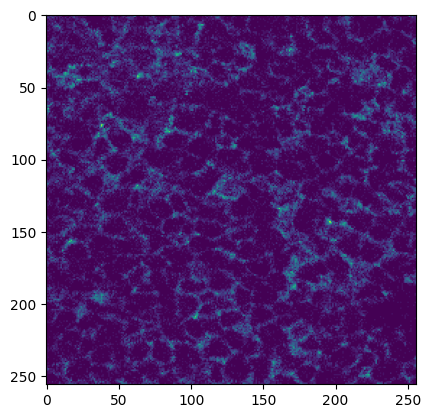

In [10]:
plt.imshow(X_test[0,...,0])

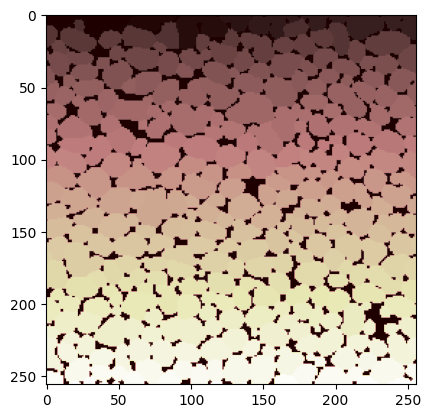

In [14]:
plt.imshow(y_test[0,...,0], cmap='pink')

In [15]:
# Test cellpose
cp_nuclear = models.CellposeModel(model_type='nuclei')
preds = cp_nuclear.eval(X_test, channels=[0,0])
preds.shape

# cp_predictions = np.array([cp_nuclear.eval(x, channels=[0,0])[0])
# cp_average_precision = average_precision(y_test, cp_predictions)



INFO:cellpose.models:>> nuclei << model set to be used
INFO:cellpose.core:>>>> using CPU
INFO:cellpose.models:>>>> model diam_mean =  17.000 (ROIs rescaled to this size during training)
INFO:cellpose.transforms:multi-stack tiff read in as having 1324 planes 2 channels
INFO:cellpose.models:100%|##########| 1324/1324 [02:53<00:00,  7.62it/s]
INFO:cellpose.models:network run in 173.73s
INFO:cellpose.models:17%|#7        | 230/1324 [00:30<02:23,  7.64it/s]
INFO:cellpose.dynamics:No cell pixels found.
INFO:cellpose.dynamics:No cell pixels found.
INFO:cellpose.models:17%|#7        | 230/1324 [00:47<02:23,  7.64it/s]
INFO:cellpose.dynamics:No cell pixels found.
INFO:cellpose.dynamics:No cell pixels found.
INFO:cellpose.dynamics:No cell pixels found.
INFO:cellpose.dynamics:No cell pixels found.
INFO:cellpose.dynamics:No cell pixels found.
INFO:cellpose.models:92%|#########1| 1216/1324 [02:48<00:13,  7.86it/s]
INFO:cellpose.dynamics:No cell pixels found.
INFO:cellpose.models:100%|##########| 13

AttributeError: 'tuple' object has no attribute 'shape'

In [18]:
preds[1]

[array([[[[ 0,  0,  0],
          [ 0,  0,  0],
          [ 0,  0,  0],
          ...,
          [ 0,  1,  2],
          [ 0,  0,  1],
          [ 0,  0,  1]],
 
         [[ 0,  0,  0],
          [ 0,  0,  0],
          [ 0,  0,  0],
          ...,
          [ 0,  0,  1],
          [ 0,  0,  1],
          [ 0,  0,  1]],
 
         [[ 0,  0,  0],
          [ 0,  0,  0],
          [ 0,  0,  0],
          ...,
          [ 0,  0,  0],
          [ 0,  0,  0],
          [ 0,  0,  0]],
 
         ...,
 
         [[42, 33,  0],
          [35, 26,  0],
          [24, 14,  1],
          ...,
          [ 1,  0,  0],
          [ 2,  0,  0],
          [ 3,  1,  0]],
 
         [[48, 32,  1],
          [44, 26,  2],
          [40, 18,  4],
          ...,
          [ 1,  0,  0],
          [ 3,  0,  0],
          [ 3,  1,  0]],
 
         [[51, 31,  2],
          [51, 27,  3],
          [50, 21,  6],
          ...,
          [ 2,  0,  0],
          [ 3,  0,  0],
          [ 4,  1,  0]]],
 
 
        [